# Advanced Pandas Operations

After examining the basics of pandas, there's still more to look at.  Here we'll discuss a number of more advanced pandas techniques and operations available to manipulate dataframes.

First there's the global ```set_option``` function - this allows us to play with some global constraints on the pandas library for our code.  Typically we will use the ```set_option``` function right after we import the library.  In the code below we are going to set the precision of floating-point values that are displayed in a dataframe to 2 decimal places, and the maximum number of rows that we display to 20.  Other options to set can be found in the [pandas documentation on the ```set_option``` function](https://urldefense.com/v3/__https://pandas.pydata.org/docs/reference/api/pandas.set_option.html__;!!AU3bcTlGKuA!A9i4LJB1SCxxcN7bX_YKSNymhB_wZg7qIhjVNpocbkRKxF0IRm5DY6boTlgW1EwMF7YEtuBuAm7RMtqPF-m2$ )

In [71]:
import pandas as pd

# set output precision to 2 decimal places
pd.set_option('display.precision',2)

# set max rows displayed to 20
pd.set_option('display.max_rows',20)

For our examples in this lesson we will use a subset of the [heart disease data set](https://urldefense.com/v3/__https://archive.ics.uci.edu/ml/datasets/heart*disease__;Kw!!AU3bcTlGKuA!A9i4LJB1SCxxcN7bX_YKSNymhB_wZg7qIhjVNpocbkRKxF0IRm5DY6boTlgW1EwMF7YEtuBuAm7RMtHDCJ4b$ ).  This dataset was taken from a number of heart patients in the 80's across four different hospitals.  We will be looking at just the Cleveland data, which has been cleaned up from the files located at the link above.

In [91]:
heart =pd.read_csv('Data/cleveland.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


When examining data it's useful to look at some summary statistics - we could write code to compute each of these stats separately, but pandas has a built-in function that allows us to get them all in one call and create a dataframe for us without doing it manually - the ```describe``` function:

In [92]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,299.00,303.00,303.00
mean,54.44,0.68,3.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.67,4.73,0.94
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,0.94,1.94,1.23
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,3.00,0.00
50%,56.00,1.00,3.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00,3.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00,2.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00,4.00


The summary stats here show us for each column the count of entries (which might be different across columns if there is missing data in any column), the mean and standard deviation, and a quartile breakdown of the data (with the median at the 50% quartile).

Looking at this summary we can already see a bit of an issue - some of this data is coded numerically in the data file but is actually not numeric data.  Look at the ```sex``` column - this data is categorized 0 for Female and 1 for Male, and so these kinds of stats are somewhat meaningless.  Statisticians call this kind of data *categorical* data, and using it as if it were actually numerical can lead to misleading results.

Fortunately we can easily change numeric data to categorical data.  For this example I'm going to first change the numeric values to their label equivalents.  I've looked through the description of the data given at the link above and come up with the mappings below.

In [93]:
column_map = {'sex':{0:'Female',1:'Male'},
              'target':{0:False,1:True,2:True,3:True,4:True},
              'cp':{1:'typical',2:'atypical',3:'non-anginal',4:'asymptomatic'},
              'fbs':{0:False,1:True},
              'restecg':{0:'normal',1:'abnormal',2:'hypertrophy'},
              'exang':{0:False,1:True},
              'slope':{1:'up',2:'flat',3:'down'},
              'thal':{3:'normal',6:'fixed',7:'reversible'}           
           }   
              
heart_rep = heart.replace(column_map)

The replace function returns a new dataframe with the column values changed according to the mapping given as a parameter.  For example, in the map above the new dataframe will have all of the 0 values in the ```sex``` column replaced with the string ```Female``` and the 1 values in the same column replaced with the string ```Male```.  Other columns replace values in a similar fashion.

In [94]:
heart_rep

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,Male,typical,145.0,233.0,True,hypertrophy,150.0,False,2.3,down,0.0,fixed,False
1,67.0,Male,asymptomatic,160.0,286.0,False,hypertrophy,108.0,True,1.5,flat,3.0,normal,True
2,67.0,Male,asymptomatic,120.0,229.0,False,hypertrophy,129.0,True,2.6,flat,2.0,reversible,True
3,37.0,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,down,0.0,normal,False
4,41.0,Female,atypical,130.0,204.0,False,hypertrophy,172.0,False,1.4,up,0.0,normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,Male,typical,110.0,264.0,False,normal,132.0,False,1.2,flat,0.0,reversible,True
299,68.0,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversible,True
300,57.0,Male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversible,True
301,57.0,Female,atypical,130.0,236.0,False,hypertrophy,174.0,False,0.0,flat,1.0,normal,True


We're not quite done yet.  If we check the type of one of our columns we can see that the datatype is 'O' - which indicates a standard Python object in our pandas framework.  What we want is a Categorical type - which we can use a simple transform to get:

In [95]:
heart_rep['sex'].dtype

dtype('O')

In [96]:
heart_rep['sex']=pd.Categorical(heart_rep['sex'])

In [97]:
heart_rep

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,Male,typical,145.0,233.0,True,hypertrophy,150.0,False,2.3,down,0.0,fixed,False
1,67.0,Male,asymptomatic,160.0,286.0,False,hypertrophy,108.0,True,1.5,flat,3.0,normal,True
2,67.0,Male,asymptomatic,120.0,229.0,False,hypertrophy,129.0,True,2.6,flat,2.0,reversible,True
3,37.0,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,down,0.0,normal,False
4,41.0,Female,atypical,130.0,204.0,False,hypertrophy,172.0,False,1.4,up,0.0,normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,Male,typical,110.0,264.0,False,normal,132.0,False,1.2,flat,0.0,reversible,True
299,68.0,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversible,True
300,57.0,Male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversible,True
301,57.0,Female,atypical,130.0,236.0,False,hypertrophy,174.0,False,0.0,flat,1.0,normal,True


In [98]:
heart_rep['sex'].dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False)

Note that even though the display looks the same as if the column were just strings, we can see tha the dtype is actually *Categorical*. The data is actually stored as a simpler mapping and the categories are kept with the column.  You can find the codes and the categories easily by using the ```cat.categories``` attribute and the ```cat.codes``` attribute:

In [99]:
print(heart_rep['sex'].cat.categories)
heart_rep['sex'].cat.codes

Index(['Female', 'Male'], dtype='object')


0      1
1      1
2      1
3      1
4      0
      ..
298    1
299    1
300    1
301    0
302    1
Length: 303, dtype: int8

We can make all of our categorical columns categorical with a simple loop:

In [100]:
categoricals = ['sex','cp','restecg','slope','thal']
for col in categoricals:
    heart_rep[col]=pd.Categorical(heart_rep[col])
heart_rep

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,Male,typical,145.0,233.0,True,hypertrophy,150.0,False,2.3,down,0.0,fixed,False
1,67.0,Male,asymptomatic,160.0,286.0,False,hypertrophy,108.0,True,1.5,flat,3.0,normal,True
2,67.0,Male,asymptomatic,120.0,229.0,False,hypertrophy,129.0,True,2.6,flat,2.0,reversible,True
3,37.0,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,down,0.0,normal,False
4,41.0,Female,atypical,130.0,204.0,False,hypertrophy,172.0,False,1.4,up,0.0,normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,Male,typical,110.0,264.0,False,normal,132.0,False,1.2,flat,0.0,reversible,True
299,68.0,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversible,True
300,57.0,Male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversible,True
301,57.0,Female,atypical,130.0,236.0,False,hypertrophy,174.0,False,0.0,flat,1.0,normal,True


And now when we get the summary stats, pandas knows that it should not treat the *categorical* columns as numbers, and skips creating summaries for these columns:

In [101]:
heart_rep.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,303.00,303.00,303.00,303.00,303.00,299.00
mean,54.44,131.69,246.69,149.61,1.04,0.67
std,9.04,17.60,51.78,22.88,1.16,0.94
min,29.00,94.00,126.00,71.00,0.00,0.00
25%,48.00,120.00,211.00,133.50,0.00,0.00
50%,56.00,130.00,241.00,153.00,0.80,0.00
75%,61.00,140.00,275.00,166.00,1.60,1.00
max,77.00,200.00,564.00,202.00,6.20,3.00


We can also see on the far right that the ```ca``` column is showing us only 299 entries, not the 303 that we'd expect from the other columns.  This is a sign of *missing data* in our dataset.  We can see what unique values are in this column by using a call to the ```unique``` method:

In [102]:
heart_rep['ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [103]:
heart_rep[heart_rep['ca'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,52.0,Male,non-anginal,138.0,223.0,False,normal,169.0,False,0.0,up,NaN,normal,False
192,43.0,Male,asymptomatic,132.0,247.0,True,hypertrophy,143.0,True,0.1,flat,NaN,reversible,True
287,58.0,Male,atypical,125.0,220.0,False,normal,144.0,False,0.4,flat,NaN,reversible,False
302,38.0,Male,non-anginal,138.0,175.0,False,normal,173.0,False,0.0,up,NaN,normal,False


Note the *nan* value - "not a number" - which marks out *null* values.  This is an indicator that there's a missing value in the CSV file. We can use the ```isnull()``` function to find the null values in our dataframe.  

What we do with missing values will vary from problem to problem.  For our purposes let's just remove the rows with missing values from our analysis.  We can do that by constructing a new dataframe with the rows with null entries removed:

In [104]:
heart_rep=heart_rep[heart_rep['ca'].notnull()]
heart_rep[heart_rep['ca'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [124]:
heart_rep

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,Male,typical,145.0,233.0,True,hypertrophy,150.0,False,2.3,down,0.0,fixed,False
1,67.0,Male,asymptomatic,160.0,286.0,False,hypertrophy,108.0,True,1.5,flat,3.0,normal,True
2,67.0,Male,asymptomatic,120.0,229.0,False,hypertrophy,129.0,True,2.6,flat,2.0,reversible,True
3,37.0,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,down,0.0,normal,False
4,41.0,Female,atypical,130.0,204.0,False,hypertrophy,172.0,False,1.4,up,0.0,normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,Female,asymptomatic,140.0,241.0,False,normal,123.0,True,0.2,flat,0.0,reversible,True
298,45.0,Male,typical,110.0,264.0,False,normal,132.0,False,1.2,flat,0.0,reversible,True
299,68.0,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversible,True
300,57.0,Male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversible,True


## Correlation matrix

Another set of statistics that is often useful to compute is a *correlation matrix*.  This is a pairwise matrix of the columns to show how correlated (or anti-correlated) variables are with each other.  Often we'll use this in statistical analyses to eliminate a data element that is highly correlated with another element and only use one of the elements.  Models are sometimes sensitive to highly correlated features.

By default the ```corr``` method produces a matrix that uses Pearson's correlation coefficient, but as the [pandas documentation](https://urldefense.com/v3/__https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html__;!!AU3bcTlGKuA!A9i4LJB1SCxxcN7bX_YKSNymhB_wZg7qIhjVNpocbkRKxF0IRm5DY6boTlgW1EwMF7YEtuBuAm7RMvzyBZCB$ ) shows other correlation methods are available if you need to use them.

In [109]:
heart_rep.corr()

,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target
age,1.00,0.29,2.03e-01,1.29e-01,-3.92e-01,0.10,1.97e-01,0.36,0.23
trestbps,0.29,1.00,1.32e-01,1.78e-01,-4.81e-02,0.07,1.92e-01,0.10,0.15
chol,0.20,0.13,1.00e+00,6.66e-03,2.18e-03,0.06,4.04e-02,0.12,0.08
fbs,0.13,0.18,6.66e-03,1.00e+00,-3.39e-03,0.01,9.09e-03,0.15,0.01
thalach,-0.39,-0.05,2.18e-03,-3.39e-03,1.00e+00,-0.38,-3.41e-01,-0.26,-0.42
exang,0.10,0.07,5.64e-02,1.16e-02,-3.76e-01,1.00,2.90e-01,0.15,0.43
oldpeak,0.20,0.19,4.04e-02,9.09e-03,-3.41e-01,0.29,1.00e+00,0.30,0.42
ca,0.36,0.10,1.19e-01,1.45e-01,-2.64e-01,0.15,2.96e-01,1.00,0.46
target,0.23,0.15,7.87e-02,1.31e-02,-4.15e-01,0.43,4.25e-01,0.46,1.00


For correlation coefficients what we are looking for are values close to 1 (or -1) to indicate highly correlated values.  Coefficients close to 0 indicate little-to-no correlation. Looking at the grid above it can be difficult to see what's going on.  Often we might want to use a *heatmap* to visualize our correlation matrices.  Unfortunately building a heatmap in pure matplotlib is a bit tedious.  Fortunately the seaborn library can be used to make nice looking plots easily - you can install the seaborn library by opening up a terminal window from the Launcher and running ```conda install seaborn``` if the following code does not work:

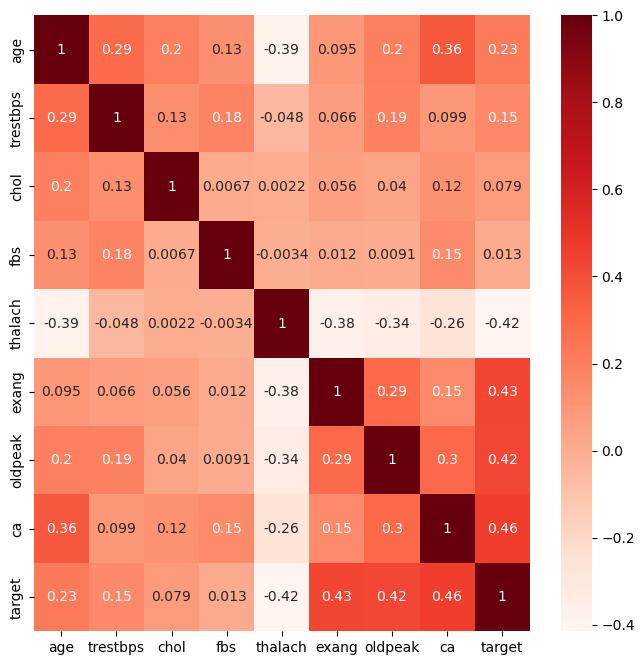

In [110]:
import matplotlib.pyplot as plt
import seaborn as sb

fig,ax = plt.subplots()

fig.set_size_inches(8,8)

# create a heatmap using the 'Reds' colormap, annotate each box
# with its value, and apply it to the subplot axes created above.
sb.heatmap(heart_rep.corr(),annot=True,ax=ax,cmap='Reds')

plt.show()

With the heatmap we can see more easily that only along the diagonal do we have high levels of correlation.  The diagonal is where a variable is compared against itself, so this isn't a problem.

Also note that the highest levels of correlation are with the 'target' variable - since this is the variable that indicates an issue when it is True, correlations with this value are actually good as they indicate features that could be relevant to what we are looking for (though even here, no feature associated with the target is even above 0.5 correlation).

## More complex queries

We saw previously how to create dataframe selections based on the values of particular columns.  The syntax for this can be a bit difficult to read as our selections become more complicated.  For example, here is how we have to use this syntax to create a simple selection of all of our Male patients who have the heart condition we are looking for:

In [111]:
heart_rep[(heart_rep['sex']=='Male') & (heart_rep['target']==True)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,67.0,Male,asymptomatic,160.0,286.0,False,hypertrophy,108.0,True,1.5,flat,3.0,normal,True
2,67.0,Male,asymptomatic,120.0,229.0,False,hypertrophy,129.0,True,2.6,flat,2.0,reversible,True
8,63.0,Male,asymptomatic,130.0,254.0,False,hypertrophy,147.0,False,1.4,flat,1.0,reversible,True
9,53.0,Male,asymptomatic,140.0,203.0,True,hypertrophy,155.0,True,3.1,down,0.0,reversible,True
12,56.0,Male,non-anginal,130.0,256.0,True,hypertrophy,142.0,True,0.6,flat,1.0,fixed,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,Male,asymptomatic,140.0,187.0,False,hypertrophy,144.0,True,4.0,up,2.0,reversible,True
296,59.0,Male,asymptomatic,164.0,176.0,True,hypertrophy,90.0,False,1.0,flat,2.0,fixed,True
298,45.0,Male,typical,110.0,264.0,False,normal,132.0,False,1.2,flat,0.0,reversible,True
299,68.0,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversible,True


For more than single column choices, pandas has a ```query``` method that can provide more readable syntax for our selections.  Here is the same selection as above, but with the query syntax:

In [112]:
heart_rep.query('sex=="Male" and target==True')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,67.0,Male,asymptomatic,160.0,286.0,False,hypertrophy,108.0,True,1.5,flat,3.0,normal,True
2,67.0,Male,asymptomatic,120.0,229.0,False,hypertrophy,129.0,True,2.6,flat,2.0,reversible,True
8,63.0,Male,asymptomatic,130.0,254.0,False,hypertrophy,147.0,False,1.4,flat,1.0,reversible,True
9,53.0,Male,asymptomatic,140.0,203.0,True,hypertrophy,155.0,True,3.1,down,0.0,reversible,True
12,56.0,Male,non-anginal,130.0,256.0,True,hypertrophy,142.0,True,0.6,flat,1.0,fixed,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,Male,asymptomatic,140.0,187.0,False,hypertrophy,144.0,True,4.0,up,2.0,reversible,True
296,59.0,Male,asymptomatic,164.0,176.0,True,hypertrophy,90.0,False,1.0,flat,2.0,fixed,True
298,45.0,Male,typical,110.0,264.0,False,normal,132.0,False,1.2,flat,0.0,reversible,True
299,68.0,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversible,True


The query language is flexible and has all of the options you would expect.  For example, if we want to find all of the Males in the dataset with the condition and either cholesterol over 200  or younger than 50, we could write the following:

In [113]:
heart_rep.query('sex=="Male" and target==True and (chol>200 or age<50)')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,67.0,Male,asymptomatic,160.0,286.0,False,hypertrophy,108.0,True,1.5,flat,3.0,normal,True
2,67.0,Male,asymptomatic,120.0,229.0,False,hypertrophy,129.0,True,2.6,flat,2.0,reversible,True
8,63.0,Male,asymptomatic,130.0,254.0,False,hypertrophy,147.0,False,1.4,flat,1.0,reversible,True
9,53.0,Male,asymptomatic,140.0,203.0,True,hypertrophy,155.0,True,3.1,down,0.0,reversible,True
12,56.0,Male,non-anginal,130.0,256.0,True,hypertrophy,142.0,True,0.6,flat,1.0,fixed,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,61.0,Male,asymptomatic,148.0,203.0,False,normal,161.0,False,0.0,up,1.0,reversible,True
285,58.0,Male,asymptomatic,114.0,318.0,False,abnormal,140.0,False,4.4,down,3.0,fixed,True
290,67.0,Male,non-anginal,152.0,212.0,False,hypertrophy,150.0,False,0.8,flat,0.0,reversible,True
292,44.0,Male,asymptomatic,120.0,169.0,False,normal,144.0,True,2.8,down,0.0,fixed,True


Note that the results of these queries are themselves dataframes, and so you can easily acquire the same summary statistics from a piece of the data separated this way:

In [114]:
heart_rep.query('sex=="Male" and target==True and (chol>200 or age<50)').describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,102.00,102.00,102.00,102.00,102.00,102.00
mean,55.82,131.09,253.36,139.55,1.48,1.13
std,8.49,17.68,41.50,23.13,1.21,1.01
min,35.00,100.00,149.00,71.00,0.00,0.00
25%,50.25,120.00,225.25,125.00,0.53,0.00
50%,57.00,128.00,254.00,141.50,1.40,1.00
75%,61.00,140.00,282.75,158.00,2.20,2.00
max,77.00,192.00,353.00,195.00,5.60,3.00


## Grouping

It's often useful to aggregate and summarize rows based on shared values.  For example, suppose we want to know how many Male and Female participants we had in our study?  We can use a ```groupby``` to create a groupby container that we can gather aggregate staistics from.

To get the count of Males vs. Females, we can group by the 'sex' column and aggregate with a count function:

In [197]:
heart_rep.groupby('sex').agg(['count'])

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,count,count,count,count,count,count,count,count,count,count,count,count,count
sex,,,,,,,,,,,,,
Female,97,97,97,97,97,97,97,97,97,97,97,97,97
Male,202,202,202,202,202,202,202,202,202,202,202,202,202


Note that since we're using the ```count``` function all of the columns give us the same value.  If we just want the counts we'll typically just pick a column to select on to get the counts out:

In [160]:
heart_rep.groupby('sex').agg(['count'])['age']

,count
sex,
Female,97
Male,202


We can aggregate over a number of functions, including those we write ourselves.  We can also pass multiple functions at once.  For example to get the mean and median for each value in our dataframe grouped by sex:

In [144]:
heart_rep_sex_mm = heart_rep.groupby('sex').agg(['mean','median'])
heart_rep_sex_mm

C:\Users\odab02\AppData\Local\Temp\ipykernel_744\1088363554.py:1: FutureWarning: ['cp', 'restecg', 'slope', 'thal'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  heart_rep_sex_mm = heart_rep.groupby('sex').agg(['mean','median'])


age        trestbps           chol          fbs        thalach  \
         mean median     mean median    mean median  mean median    mean   
sex                                                                        
Female  55.72   57.0   133.34  132.0  261.75  254.0  0.12    0.0  151.23   
Male    53.96   55.0   130.87  130.0  240.06  235.5  0.16    0.0  148.68   

              exang        oldpeak           ca        target         
       median  mean median    mean median  mean median   mean median  
sex                                                                   
Female  157.0  0.23    0.0    0.87   0.60  0.55    0.0   0.26    0.0  
Male    150.5  0.38    0.0    1.14   0.85  0.73    0.0   0.56    1.0

We can access individual column aggregates by using the column name:

In [39]:
heart_rep_sex_mm['age']

,mean,median
sex,,
Female,55.72,57.0
Male,53.96,55.0


And we can access the individual aggregates in the same way:

In [40]:
heart_rep_sex_mm['age']['median']

sex
Female    57.0
Male      55.0
Name: median, dtype: float64

We can also group by multiple columns.  For example grouping by the sex and whether the patient had a heart condition:

In [141]:
heart_rep.groupby(['sex','target']).agg(['count','mean','median'])

C:\Users\odab02\AppData\Local\Temp\ipykernel_744\2253309461.py:1: FutureWarning: ['cp', 'restecg', 'slope', 'thal'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  heart_rep.groupby(['sex','target']).agg(['count','mean','median'])


age               trestbps                 chol          \
              count   mean median    count    mean median count    mean   
sex    target                                                             
Female False     72  54.56   54.0       72  128.74  130.0    72  256.75   
       True      25  59.08   60.0       25  146.60  140.0    25  276.16   
Male   False     89  51.10   52.0       89  129.52  130.0    89  232.46   
       True     113  56.20   58.0      113  131.93  130.0   113  246.05   

                       fbs  ... thalach exang              oldpeak        \
              median count  ...  median count  mean median   count  mean   
sex    target               ...                                            
Female False   249.0    72  ...   159.0    72  0.11    0.0      72  0.55   
       True    268.0    25  ...   146.0    25  0.56    1.0      25  1.77   
Male   False   232.0    89  ...   163.0    89  0.17    0.0      89  0.63   
       True    248.0   113  ...   141.0   113  0.54    1.0     113  1.54   

                        ca               
              median count  mean median  
sex    target                            
Female False    0.25    72  0.31    0.0  
       True     1.40    25  1.24    1.0  
Male   False    0.20    89  0.25    0.0  
       True     1.40   113  1.12    1.0  

[4 rows x 24 columns]

## Worked example - Histogram Plots

Let's suppose we want to take a look at some aggregate statistics for our data.  We're going to look at the breakdown of our participants by age into age groups, and take a look at some average values according to those age groups.

A histogram is a type of a plot that groups the data into bins.

Let's first recall our dataframe:

In [184]:
heart_rep

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,Male,typical,145.0,233.0,True,hypertrophy,150.0,False,2.3,down,0.0,fixed,False
1,67.0,Male,asymptomatic,160.0,286.0,False,hypertrophy,108.0,True,1.5,flat,3.0,normal,True
2,67.0,Male,asymptomatic,120.0,229.0,False,hypertrophy,129.0,True,2.6,flat,2.0,reversible,True
3,37.0,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,down,0.0,normal,False
4,41.0,Female,atypical,130.0,204.0,False,hypertrophy,172.0,False,1.4,up,0.0,normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,Female,asymptomatic,140.0,241.0,False,normal,123.0,True,0.2,flat,0.0,reversible,True
298,45.0,Male,typical,110.0,264.0,False,normal,132.0,False,1.2,flat,0.0,reversible,True
299,68.0,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversible,True
300,57.0,Male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversible,True



To begin, let's see what our age range looks like:

In [185]:
print(heart_rep['age'].min())
print(heart_rep['age'].max())

29.0
77.0


First we need to create a selection of bins.  We'll group together participants across 5 year spans from 35 to 70.  We'll go ahead and lump together everyone under 35 into a single bin, and everyone above 70 in a single bin. We can do this with the ```cut``` function, which creates a Series assigning each row of our data to a bin based on values in a range.  We'll pass in a list of ranges - for each range the lower bound is NOT included in the range (so below, the first bin will include participants whose age is exactly 35, and the second bin will not)

In [186]:
bins=pd.cut(heart_rep['age'],bins=[0,35,40,45,50,55,60,65,70,heart_rep['age'].max()])
bins

0      (60.0, 65.0]
1      (65.0, 70.0]
2      (65.0, 70.0]
3      (35.0, 40.0]
4      (40.0, 45.0]
           ...     
297    (55.0, 60.0]
298    (40.0, 45.0]
299    (65.0, 70.0]
300    (55.0, 60.0]
301    (55.0, 60.0]
Name: age, Length: 299, dtype: category
Categories (9, interval[float64, right]): [(0.0, 35.0] < (35.0, 40.0] < (40.0, 45.0] < (45.0, 50.0] ... (55.0, 60.0] < (60.0, 65.0] < (65.0, 70.0] < (70.0, 77.0]]

Next we use a group by to aggregate our values together by age group.  We'll use the mean and median aggregate functions in our example since we're looking for averages. Note that the column designations that are Categorical do not produce a meaningful mean and median. Therefore, pandas automatically skips those. However, it also may give you a warning, depending on the version of pandas you are using. 

In [187]:
heart_age = heart_rep.groupby([bins]).agg(['mean','median'])
heart_age

C:\Users\odab02\AppData\Local\Temp\ipykernel_744\449616403.py:1: FutureWarning: ['sex', 'cp', 'restecg', 'slope', 'thal'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  heart_age = heart_rep.groupby([bins]).agg(['mean','median'])


age        trestbps           chol          fbs         \
               mean median     mean median    mean median  mean median   
age                                                                      
(0.0, 35.0]   33.86   35.0   124.57  122.0  207.29  198.0  0.00    0.0   
(35.0, 40.0]  38.80   39.0   126.20  125.0  224.40  219.5  0.00    0.0   
(40.0, 45.0]  42.98   43.0   122.55  120.0  236.41  234.5  0.05    0.0   
(45.0, 50.0]  48.00   48.0   126.10  129.0  236.52  243.0  0.10    0.0   
(50.0, 55.0]  52.93   53.0   130.70  130.0  250.25  245.5  0.20    0.0   
(55.0, 60.0]  57.99   58.0   136.06  132.0  248.44  240.5  0.21    0.0   
(60.0, 65.0]  62.98   63.0   136.59  138.0  262.46  254.0  0.15    0.0   
(65.0, 70.0]  67.56   67.0   139.59  144.0  259.00  245.0  0.19    0.0   
(70.0, 77.0]  73.33   72.5   127.83  122.5  247.67  267.0  0.17    0.0   

             thalach        exang        oldpeak           ca        target  \
                mean median  mean median    mean median  mean median   mean   
age                                                                           
(0.0, 35.0]   172.86  174.0  0.29    0.0    0.53    0.0  0.00    0.0   0.29   
(35.0, 40.0]  166.50  178.5  0.30    0.0    1.19    0.6  0.00    0.0   0.40   
(40.0, 45.0]  162.02  168.0  0.20    0.0    0.61    0.0  0.23    0.0   0.20   
(45.0, 50.0]  154.29  158.0  0.19    0.0    0.67    0.2  0.45    0.0   0.42   
(50.0, 55.0]  149.50  155.5  0.39    0.0    1.02    0.7  0.57    0.0   0.36   
(55.0, 60.0]  146.50  151.0  0.40    0.0    1.21    1.0  0.81    1.0   0.64   
(60.0, 65.0]  141.59  145.0  0.35    0.0    1.50    1.4  1.04    1.0   0.61   
(65.0, 70.0]  135.78  141.0  0.33    0.0    1.28    1.0  1.19    1.0   0.56   
(70.0, 77.0]  136.00  127.5  0.33    0.0    0.55    0.3  1.17    1.0   0.17   

                     
             median  
age                  
(0.0, 35.0]     0.0  
(35.0, 40.0]    0.0  
(40.0, 45.0]    0.0  
(45.0, 50.0]    0.0  
(50.0, 55.0]    0.0  
(55.0, 60.0]    1.0  
(60.0, 65.0]    1.0  
(65.0, 70.0]    1.0  
(70.0, 77.0]    0.0

In [188]:
heart_rp = heart_rep[['age', 'trestbps','chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'target']]
heart_age = heart_rp.groupby([bins]).agg(['mean','median'])
heart_age

age        trestbps           chol          fbs         \
               mean median     mean median    mean median  mean median   
age                                                                      
(0.0, 35.0]   33.86   35.0   124.57  122.0  207.29  198.0  0.00    0.0   
(35.0, 40.0]  38.80   39.0   126.20  125.0  224.40  219.5  0.00    0.0   
(40.0, 45.0]  42.98   43.0   122.55  120.0  236.41  234.5  0.05    0.0   
(45.0, 50.0]  48.00   48.0   126.10  129.0  236.52  243.0  0.10    0.0   
(50.0, 55.0]  52.93   53.0   130.70  130.0  250.25  245.5  0.20    0.0   
(55.0, 60.0]  57.99   58.0   136.06  132.0  248.44  240.5  0.21    0.0   
(60.0, 65.0]  62.98   63.0   136.59  138.0  262.46  254.0  0.15    0.0   
(65.0, 70.0]  67.56   67.0   139.59  144.0  259.00  245.0  0.19    0.0   
(70.0, 77.0]  73.33   72.5   127.83  122.5  247.67  267.0  0.17    0.0   

             thalach        exang        oldpeak           ca        target  \
                mean median  mean median    mean median  mean median   mean   
age                                                                           
(0.0, 35.0]   172.86  174.0  0.29    0.0    0.53    0.0  0.00    0.0   0.29   
(35.0, 40.0]  166.50  178.5  0.30    0.0    1.19    0.6  0.00    0.0   0.40   
(40.0, 45.0]  162.02  168.0  0.20    0.0    0.61    0.0  0.23    0.0   0.20   
(45.0, 50.0]  154.29  158.0  0.19    0.0    0.67    0.2  0.45    0.0   0.42   
(50.0, 55.0]  149.50  155.5  0.39    0.0    1.02    0.7  0.57    0.0   0.36   
(55.0, 60.0]  146.50  151.0  0.40    0.0    1.21    1.0  0.81    1.0   0.64   
(60.0, 65.0]  141.59  145.0  0.35    0.0    1.50    1.4  1.04    1.0   0.61   
(65.0, 70.0]  135.78  141.0  0.33    0.0    1.28    1.0  1.19    1.0   0.56   
(70.0, 77.0]  136.00  127.5  0.33    0.0    0.55    0.3  1.17    1.0   0.17   

                     
             median  
age                  
(0.0, 35.0]     0.0  
(35.0, 40.0]    0.0  
(40.0, 45.0]    0.0  
(45.0, 50.0]    0.0  
(50.0, 55.0]    0.0  
(55.0, 60.0]    1.0  
(60.0, 65.0]    1.0  
(65.0, 70.0]    1.0  
(70.0, 77.0]    0.0

We can narrow this down and look just at the cholesterol values:

In [189]:
heart_age['chol']

,mean,median
age,,
"(0.0, 35.0]",207.29,198.0
"(35.0, 40.0]",224.40,219.5
"(40.0, 45.0]",236.41,234.5
"(45.0, 50.0]",236.52,243.0
"(50.0, 55.0]",250.25,245.5
"(55.0, 60.0]",248.44,240.5
"(60.0, 65.0]",262.46,254.0
"(65.0, 70.0]",259.00,245.0
"(70.0, 77.0]",247.67,267.0


Note that the range column here is the index of our dataframe and is a categorical value.  We can see this by looking at the index:

In [190]:
heart_age.index

CategoricalIndex([ (0.0, 35.0], (35.0, 40.0], (40.0, 45.0], (45.0, 50.0],
                  (50.0, 55.0], (55.0, 60.0], (60.0, 65.0], (65.0, 70.0],
                  (70.0, 77.0]],
                 categories=[(0.0, 35.0], (35.0, 40.0], (40.0, 45.0], (45.0, 50.0], (50.0, 55.0], (55.0, 60.0], (60.0, 65.0], (65.0, 70.0], ...], ordered=True, dtype='category', name='age')

As we saw earlier, we can get the numeric mapping of categories to codes easily:

In [191]:
heart_age.index.codes

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int8)

What if we want to separate out the members of each age group that have the heart condition and those that do not?  We can create a new groupby that includes both columns by just including the target column in our groupby:

In [192]:
heart_age_target = heart_rp.groupby([bins,'target']).agg(['mean','median'])
heart_age_target

age        trestbps           chol          fbs         \
                      mean median     mean median    mean median  mean median   
age          target                                                             
(0.0, 35.0]  False   33.40   34.0   125.20  122.0  194.20  192.0  0.00    0.0   
             True    35.00   35.0   123.00  123.0  240.00  240.0  0.00    0.0   
(35.0, 40.0] False   38.50   39.0   127.00  134.0  234.00  217.5  0.00    0.0   
             True    39.25   39.5   125.00  119.0  210.00  221.0  0.00    0.0   
(40.0, 45.0] False   42.86   43.0   122.86  120.0  233.37  234.0  0.03    0.0   
             True    43.44   44.0   121.33  120.0  248.22  264.0  0.11    0.0   
(45.0, 50.0] False   48.00   48.0   124.72  129.5  236.17  244.5  0.11    0.0   
             True    48.00   48.0   128.00  124.0  237.00  243.0  0.08    0.0   
(50.0, 55.0] False   52.72   53.0   128.75  130.0  246.31  242.0  0.25    0.0   
             True    53.30   54.0   134.20  128.0  257.35  260.5  0.10    0.0   
(55.0, 60.0] False   57.77   58.0   131.46  131.0  238.38  235.0  0.19    0.0   
             True    58.11   58.0   138.65  133.0  254.13  254.5  0.22    0.0   
(60.0, 65.0] False   63.44   64.0   140.28  140.0  268.33  247.5  0.22    0.0   
             True    62.68   62.5   134.21  136.5  258.68  257.0  0.11    0.0   
(65.0, 70.0] False   67.42   67.0   136.92  143.0  275.33  242.0  0.08    0.0   
             True    67.67   67.0   141.73  144.0  245.93  246.0  0.27    0.0   
(70.0, 77.0] False   72.60   71.0   128.40  120.0  236.40  265.0  0.20    0.0   
             True    77.00   77.0   125.00  125.0  304.00  304.0  0.00    0.0   

                    thalach        exang        oldpeak           ca         
                       mean median  mean median    mean median  mean median  
age          target                                                          
(0.0, 35.0]  False   184.80  182.0  0.00    0.0    0.42   0.00  0.00    0.0  
             True    143.00  143.0  1.00    1.0    0.80   0.80  0.00    0.0  
(35.0, 40.0] False   174.67  178.5  0.17    0.0    0.82   0.00  0.00    0.0  
             True    154.25  160.5  0.50    0.5    1.75   1.60  0.00    0.0  
(40.0, 45.0] False   166.77  170.0  0.11    0.0    0.44   0.00  0.14    0.0  
             True    143.56  144.0  0.56    1.0    1.26   1.20  0.56    0.0  
(45.0, 50.0] False   163.11  162.0  0.11    0.0    0.29   0.00  0.11    0.0  
             True    142.08  144.0  0.31    0.0    1.20   0.90  0.92    0.0  
(50.0, 55.0] False   156.61  158.5  0.17    0.0    0.57   0.40  0.36    0.0  
             True    136.70  131.0  0.80    1.0    1.84   1.50  0.95    1.0  
(55.0, 60.0] False   156.85  162.0  0.19    0.0    0.72   0.55  0.12    0.0  
             True    140.65  142.5  0.52    1.0    1.49   1.20  1.20    1.0  
(60.0, 65.0] False   147.39  149.0  0.22    0.0    0.77   0.70  0.50    0.0  
             True    137.86  142.0  0.43    0.0    1.96   1.80  1.39    1.0  
(65.0, 70.0] False   143.33  147.0  0.00    0.0    0.97   0.70  0.67    0.5  
             True    129.73  129.0  0.60    1.0    1.53   1.50  1.60    2.0  
(70.0, 77.0] False   130.80  125.0  0.20    0.0    0.66   0.40  0.80    1.0  
             True    162.00  162.0  1.00    1.0    0.00   0.00  3.00    3.0

In [193]:
heart_age_target.index.codes

FrozenList([[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]])

In [194]:
heart_age_target.index.codes[0]

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8], dtype=int8)

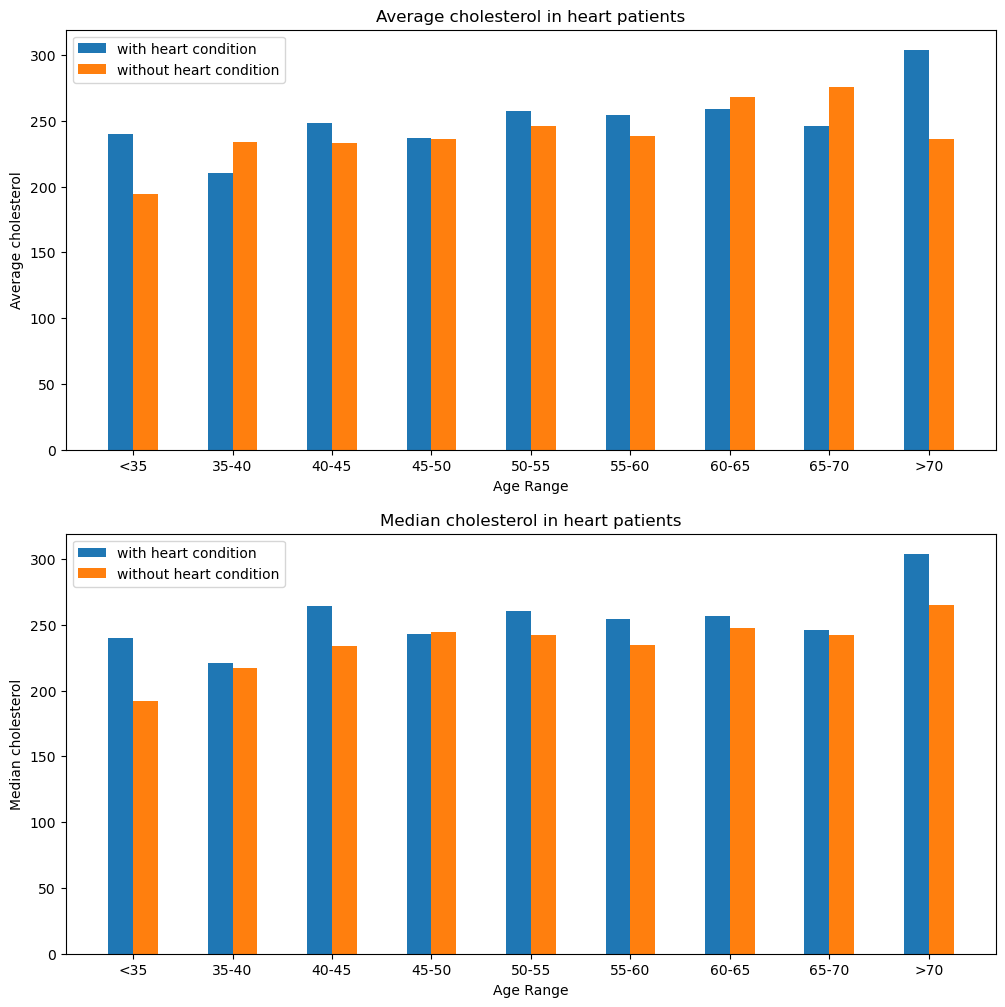

In [198]:
import matplotlib.pyplot as plt
import numpy as np

width=0.25

# Create human-readable labels for the x-axis
labels = ['<35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','>70']

# set up x and y values for the bar chart
x = heart_age_target.query('target==True').index.codes[0]
y_true = heart_age_target.query('target == True')['chol']['mean']
y_false = heart_age_target.query('target == False')['chol']['mean']

# Set up 2 subplots and make the figure larger for display
fig,ax = plt.subplots(2)
fig.set_size_inches(12,12)

# Two histogram plots showing the mean cholesterol levels
ax[0].bar(x-width/2,y_true,width=width,align='center',label='with heart condition')
ax[0].bar(x+width/2,y_false,width=width,align='center',label='without heart condition')

# Set up the labeling and title for the top graph
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)

ax[0].set_xlabel('Age Range')
ax[0].set_ylabel('Average cholesterol')
ax[0].set_title('Average cholesterol in heart patients')
ax[0].legend()

# Set up y values for the bar charts
y_true = heart_age_target.query('target == True')['chol']['median']
y_false = heart_age_target.query('target == False')['chol']['median']

# Two histogram plots showing the median cholesterol levels
ax[1].bar(x-width/2,y_true,width=width,align='center',label='with heart condition')
ax[1].bar(x+width/2,y_false,width=width,align='center',label='without heart condition')

# Set up the labeling and title for the bottom graph
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)

ax[1].set_xlabel('Age Range')
ax[1].set_ylabel('Median cholesterol')
ax[1].set_title('Median cholesterol in heart patients')
ax[1].legend()

plt.show()

### Pairwise Analysis of Two Variables - Scatter Plot

Another useful plot that we might want to examine is to directly plot two variables against each other.  We can do that with a scatter plot.  We can, for example, plot our patient's cholesterol vs age fairly easily as a scatter plot

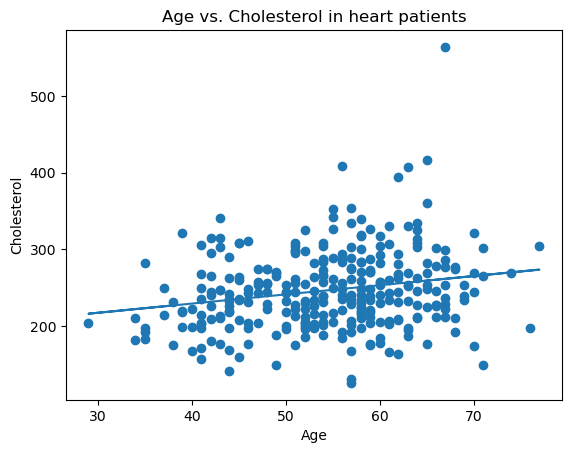

R-squared for regression:  0.04366021531083333


In [182]:
fig,ax = plt.subplots()

ax.scatter(heart['age'],heart['chol'])
m,b = np.polyfit(heart['age'],heart['chol'],1)
ax.plot(heart['age'],heart['age']*m+b)

ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_title('Age vs. Cholesterol in heart patients')

plt.show()

corr_matrix = np.corrcoef(heart['chol'],m*heart['age']+b)
R = corr_matrix[0,1]
R_sq = R**2
print('R-squared for regression: ',R_sq)

We can also separate our data into those who have the diagnosed condition and those that do not and plot them separately.

R-squared for regression with heart condition:  0.0992073878382096
R-squared for regression without heart condition:  0.06171287947776151


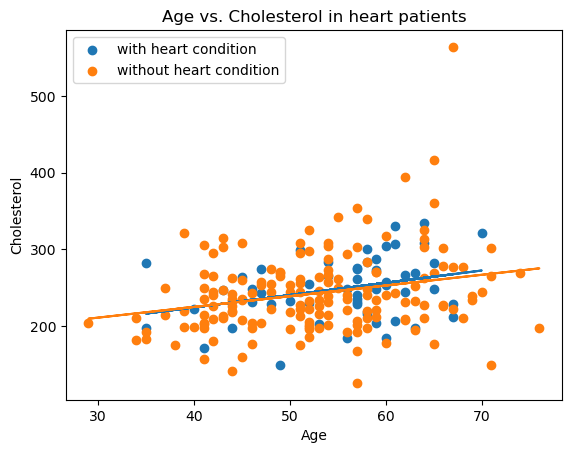

In [196]:
fig,ax = plt.subplots()

with_cond = heart.query('target == True')
without_cond = heart.query('target == False')

ax.scatter(with_cond['age'],with_cond['chol'],label='with heart condition')
m,b = np.polyfit(with_cond['age'],with_cond['chol'],1)
ax.plot(with_cond['age'],with_cond['age']*m+b)

corr_matrix = np.corrcoef(with_cond['chol'],m*with_cond['age']+b)
R = corr_matrix[0,1]
R_sq = R**2
print('R-squared for regression with heart condition: ',R_sq)

ax.scatter(without_cond['age'],without_cond['chol'],label='without heart condition')
m,b = np.polyfit(without_cond['age'],without_cond['chol'],1)
ax.plot(without_cond['age'],without_cond['age']*m+b)

ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_title('Age vs. Cholesterol in heart patients')
ax.legend()

corr_matrix = np.corrcoef(without_cond['chol'],m*without_cond['age']+b)
R = corr_matrix[0,1]
R_sq = R**2
print('R-squared for regression without heart condition: ',R_sq)

plt.show()
